### DEseq2 analysis - R part 
## Input with spike-in normalized value
<p style="text-align: right;"> Written by Soomin Son
<p style="text-align: right;"> Last revised: 15. 06. 2020.</p>

### Settings

In [ ]:
### Bring my personal R library
.libPaths('/casa/soomin/miniconda3/envs/py37/lib/R/library')
#library(DESeq2)
#library(DEGreport)
#library(tidyverse)
#library(pheatmap)

: 

--- 

# Case1) Normed count with spike-ins

### Loading data

In [64]:
data <- read.csv("Results/norm_count_w_spikeIn.csv", row.names=1)
meta <- read.table("meta.txt", header=T, row.names=1)

In [65]:
head(data)

,HCT116_sDro1,HCT116_FL1,HCT116_sDro2,HCT116_FL2,HCT116_sDro3,HCT116_FL3
hsa-let-7a-2-3p,14,134,22,74,33,115
hsa-let-7a-3p,251,718,262,712,248,559
hsa-let-7a-5p,9978,24633,8970,21911,10238,24280
hsa-let-7b-3p,62,231,44,216,67,193
hsa-let-7b-5p,2308,6800,2091,5403,1579,4093
hsa-let-7c-3p,0,3,0,0,1,1


In [66]:
head(meta)

,sampletype
HCT116_sDro1,sDro
HCT116_FL1,FL
HCT116_sDro2,sDro
HCT116_FL2,FL
HCT116_sDro3,sDro
HCT116_FL3,FL


#### Match the meta and data

In [67]:
(colnames(data) %in% rownames(meta))
(colnames(data) == rownames(meta))

[1] TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE

---

### Create DESeq2 object

In [68]:
dds <- DESeqDataSetFromMatrix(countData=round(data), colData=meta, design=~sampletype)
head(counts(dds))

converting counts to integer mode



,HCT116_sDro1,HCT116_FL1,HCT116_sDro2,HCT116_FL2,HCT116_sDro3,HCT116_FL3
hsa-let-7a-2-3p,14,134,22,74,33,115
hsa-let-7a-3p,251,718,262,712,248,559
hsa-let-7a-5p,9978,24633,8970,21911,10238,24280
hsa-let-7b-3p,62,231,44,216,67,193
hsa-let-7b-5p,2308,6800,2091,5403,1579,4093
hsa-let-7c-3p,0,3,0,0,1,1


---

### Sample-level QC

In [69]:
rld <- rlog(dds, blind=TRUE)

#### PCA

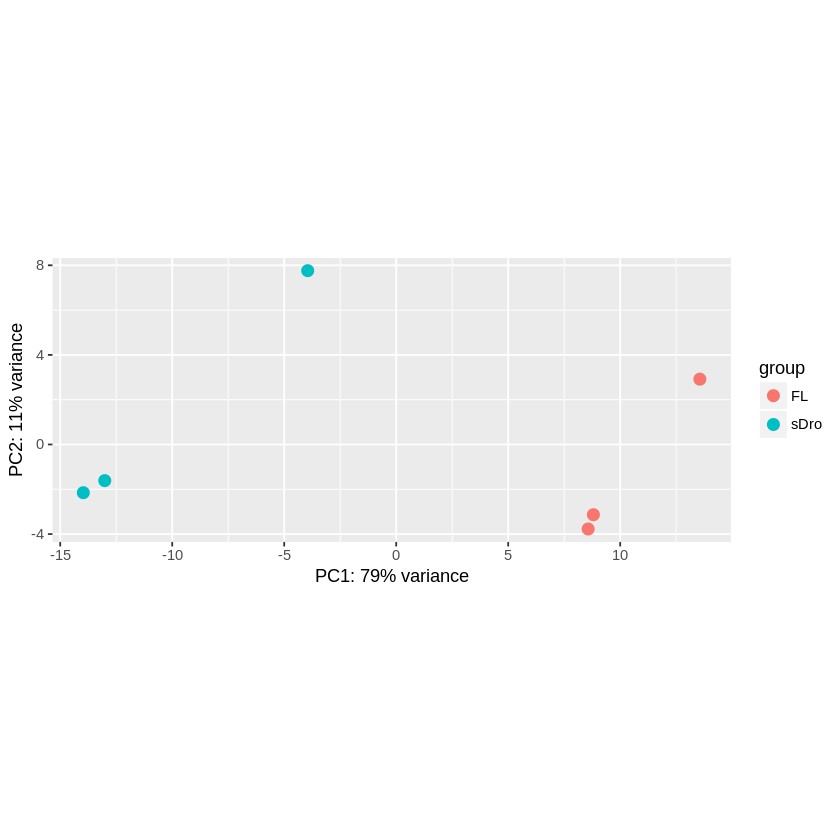

In [70]:
plotPCA(rld, intgroup='sampletype')

---

#### Hierarchical clustering

In [71]:
rld_mat <- assay(rld)
rld_cor <-cor(rld_mat)
head(rld_cor)

,HCT116_sDro1,HCT116_FL1,HCT116_sDro2,HCT116_FL2,HCT116_sDro3,HCT116_FL3
HCT116_sDro1,1.0000000,0.9854728,0.9963853,0.9851433,0.9928465,0.9793096
HCT116_FL1,0.9854728,1.0000000,0.9862167,0.9977709,0.9914940,0.9958722
HCT116_sDro2,0.9963853,0.9862167,1.0000000,0.9862394,0.9931724,0.9804612
HCT116_FL2,0.9851433,0.9977709,0.9862394,1.0000000,0.9916613,0.9961778
HCT116_sDro3,0.9928465,0.9914940,0.9931724,0.9916613,1.0000000,0.9899516
HCT116_FL3,0.9793096,0.9958722,0.9804612,0.9961778,0.9899516,1.0000000


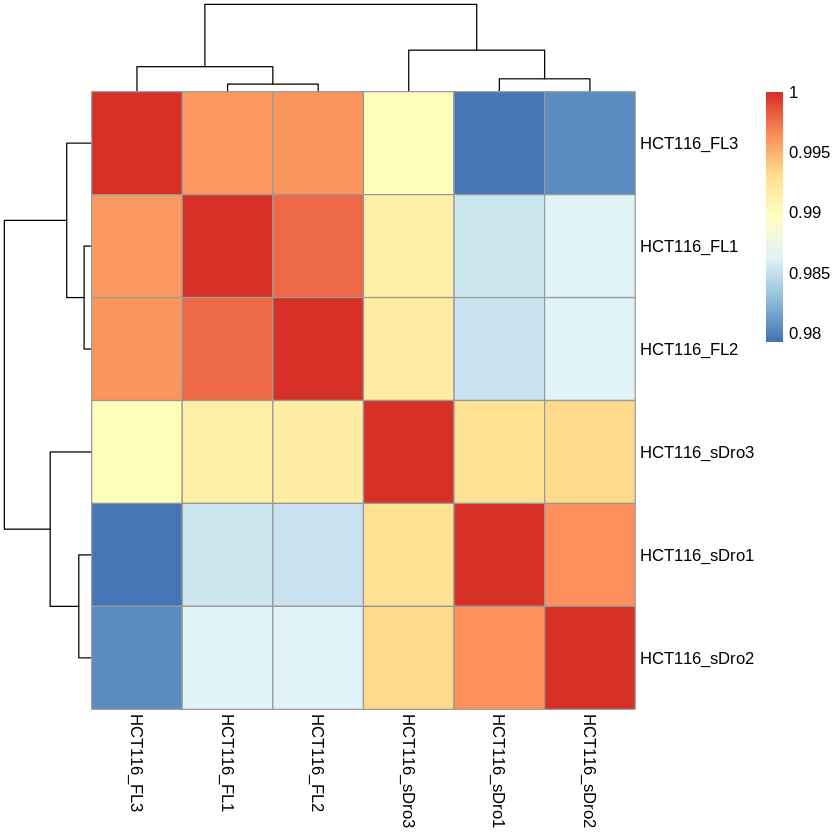

In [72]:
pheatmap(rld_cor)

---

### DE analysis

In [73]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [74]:
sizeFactors(dds)

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
   0.6276870    1.6967857    0.6407120    1.5462800    0.6439235    1.4438276

In [75]:
colSums(counts(dds))

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
      332391      1053737       332251       999634       335014       897184

In [76]:
colSums(counts(dds,normalized=TRUE))

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
    529548.9     621019.5     518565.3     646476.7     520269.9     621392.8

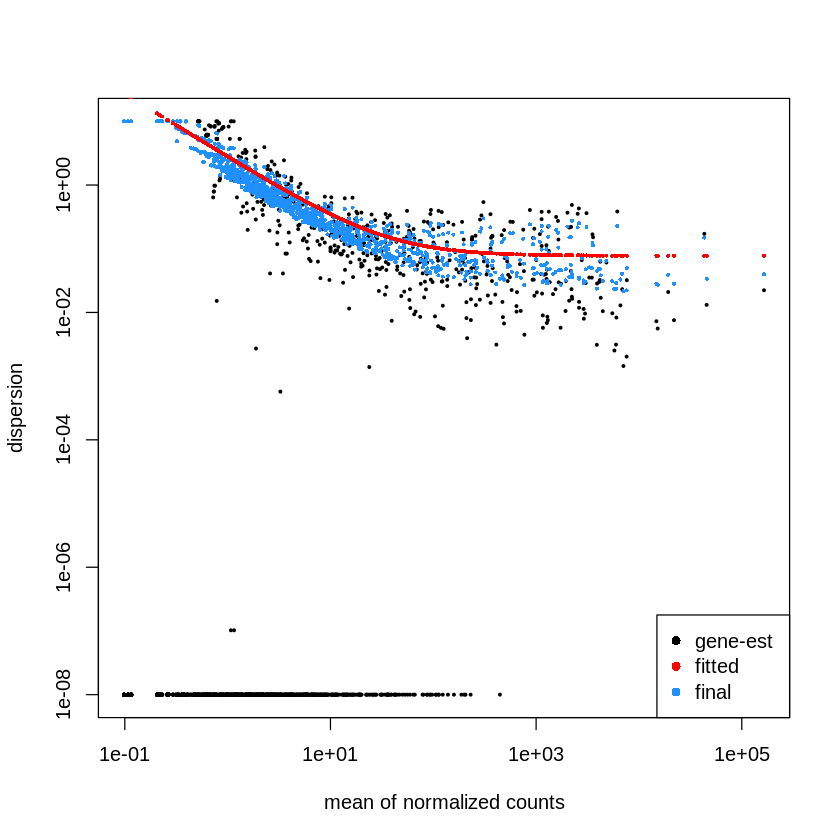

In [77]:
plotDispEsts(dds)

In [78]:
# Define contrasts, extract results table, and shrink log2 fold changes

contrast_sDroFL <- c("sampletype", "sDro", "FL")
res_table_unshrunken <- results(dds, contrast = contrast_sDroFL, alpha = 0.05)
res_table <- lfcShrink(dds, contrast = contrast_sDroFL, res=res_table_unshrunken)

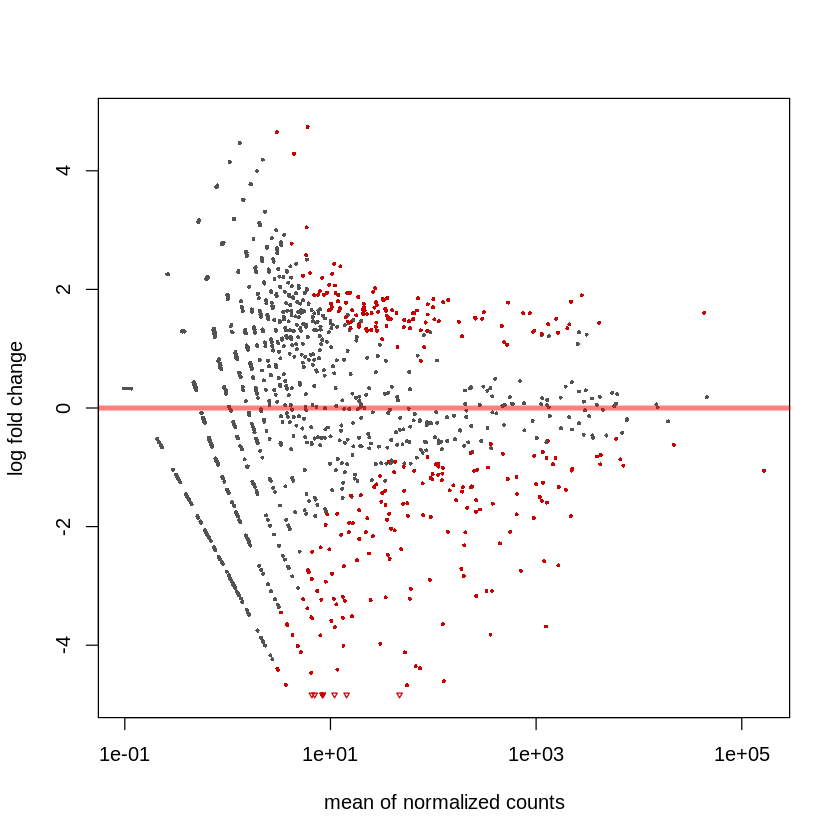

In [79]:
# MA plot with unshrunken results

plotMA(res_table_unshrunken)

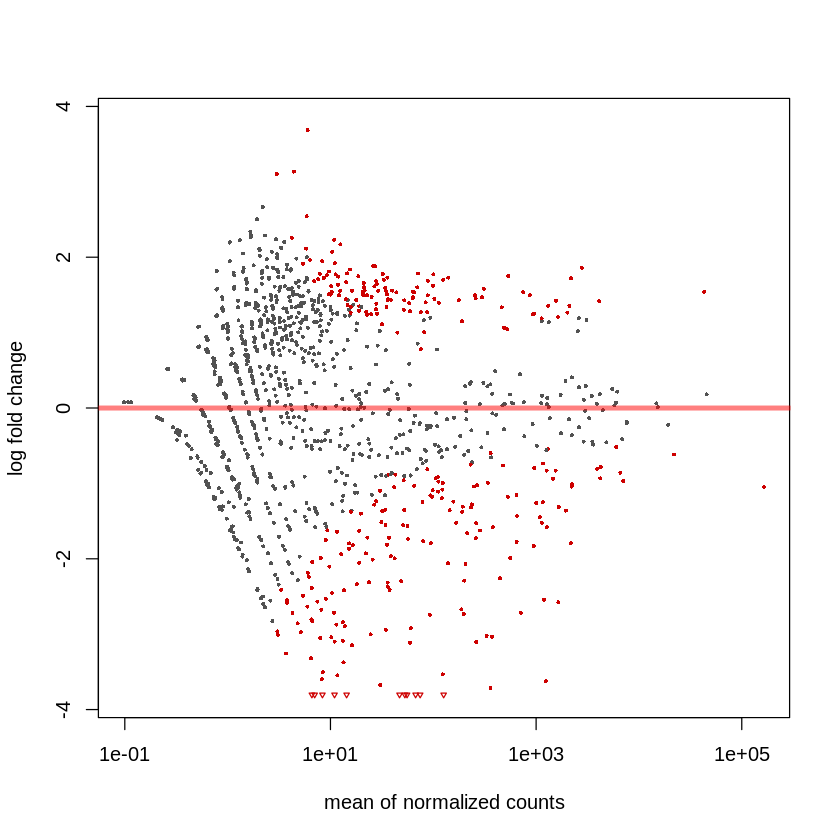

In [80]:
### MA plot with shrunken results

plotMA(res_table)

---

### Save results - normed counts including spike-ins

In [81]:
write.csv(as.data.frame(res_table %>% data.frame()), file="Results/DE_norm_w_spikeIn.csv")

--- 

# Case2) normed count without spike-ins

### Loading data

In [82]:
data <- read.csv("Results/norm_count_wo_spikeIn.csv", row.names=1)

---

### Create DESeq2 object

In [83]:
dds <- DESeqDataSetFromMatrix(countData=round(data), colData=meta, design=~sampletype)
head(counts(dds))

converting counts to integer mode



,HCT116_sDro1,HCT116_FL1,HCT116_sDro2,HCT116_FL2,HCT116_sDro3,HCT116_FL3
hsa-let-7a-2-3p,14,134,22,74,33,115
hsa-let-7a-3p,251,718,262,712,248,559
hsa-let-7a-5p,9978,24633,8970,21911,10238,24280
hsa-let-7b-3p,62,231,44,216,67,193
hsa-let-7b-5p,2308,6800,2091,5403,1579,4093
hsa-let-7c-3p,0,3,0,0,1,1


---

### Sample-level QC

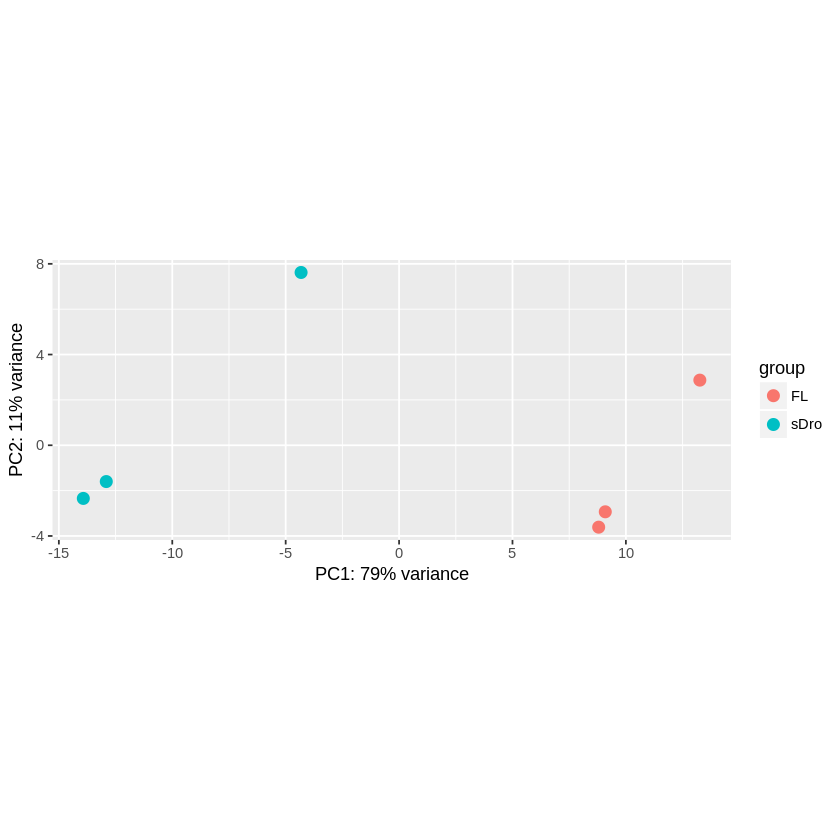

In [84]:
rld <- rlog(dds, blind=TRUE)
plotPCA(rld, intgroup='sampletype')

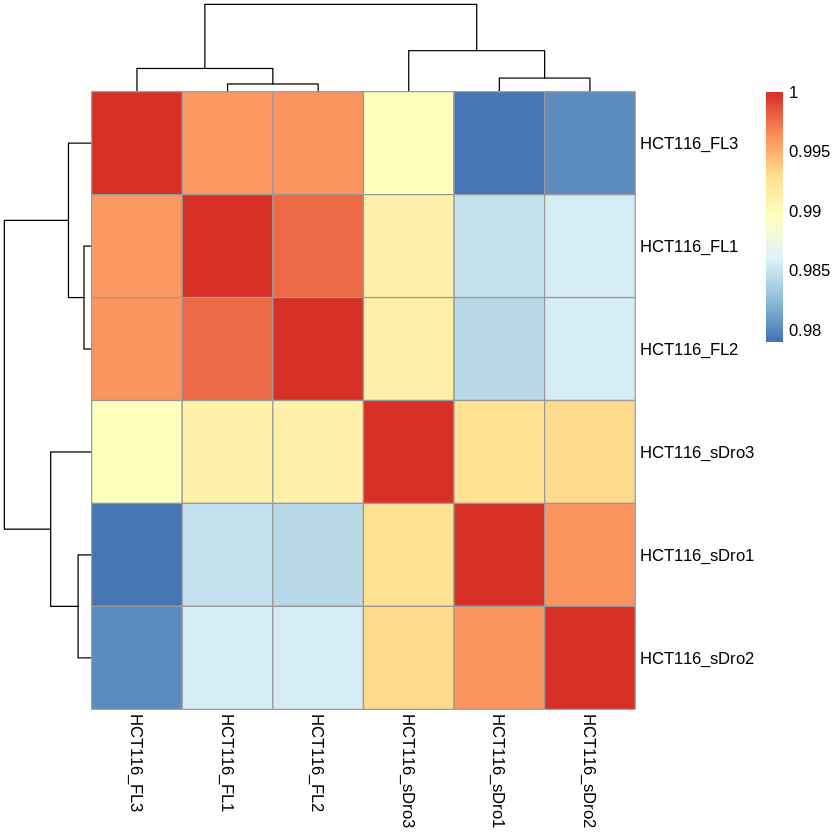

In [85]:
rld_mat <- assay(rld)
rld_cor <-cor(rld_mat)
pheatmap(rld_cor)

---

### DE analysis

In [86]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [87]:
sizeFactors(dds)

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
   0.6183218    1.7102794    0.6263586    1.5501722    0.6494869    1.4867636

In [88]:
colSums(counts(dds))

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
      306981      1023571       305261       973037       326921       887503

In [89]:
colSums(counts(dds,normalized=TRUE))

HCT116_sDro1   HCT116_FL1 HCT116_sDro2   HCT116_FL2 HCT116_sDro3   HCT116_FL3 
    496474.5     598481.7     487358.2     627696.1     503352.8     596936.2

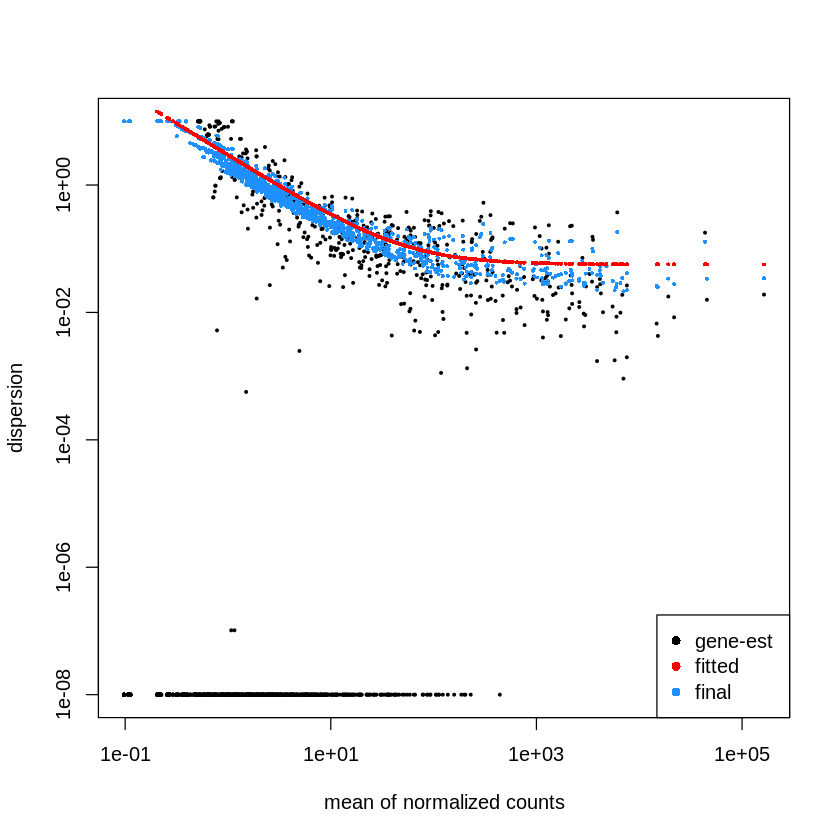

In [90]:
plotDispEsts(dds)

In [91]:
# Define contrasts, extract results table, and shrink log2 fold changes

contrast_sDroFL <- c("sampletype", "sDro", "FL")
res_table_unshrunken <- results(dds, contrast = contrast_sDroFL, alpha = 0.05)
res_table <- lfcShrink(dds, contrast = contrast_sDroFL, res=res_table_unshrunken)

---

### Save results - normed counts without spike-ins

In [92]:
write.csv(as.data.frame(res_table %>% data.frame()), file="Results/DE_norm_wo_spikeIn.csv")

### Go back to 200529_DEseq2_analysis_SpikeInnormalized-python